<a href="https://colab.research.google.com/github/godineanvesh/Adaptive_Boosting_Iris_dataset/blob/main/hfjakdfhs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn import set_config

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



In [ ]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
sns.set_palette('rocket')
heatcmap = sns.diverging_palette(230, 20, as_cmap=True)

In [ ]:
customer_df = pd.read_csv('https://github.com/SavioSal/datasets/raw/master/ProspectsandCustomers.txt')

customer_df = customer_df.drop('ID', axis=1)
customer_df = customer_df.rename(index=str, columns={ 'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'SpendingScore'})

In [ ]:
customer_df

,Gender,Age,Income,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [ ]:
print('Shape: ', customer_df.shape)

print('---')
print(customer_df.dtypes)

print('---')
print(customer_df.describe())

print('---')
print(customer_df.isnull().sum())

Shape:  (200, 4)
---
Gender           object
Age               int64
Income            int64
SpendingScore     int64
dtype: object
---
              Age      Income  SpendingScore
count  200.000000  200.000000     200.000000
mean    38.850000   60.560000      50.200000
std     13.969007   26.264721      25.823522
min     18.000000   15.000000       1.000000
25%     28.750000   41.500000      34.750000
50%     36.000000   61.500000      50.000000
75%     49.000000   78.000000      73.000000
max     70.000000  137.000000      99.000000
---
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64


In [ ]:
customer_df.head()

,Gender,Age,Income,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


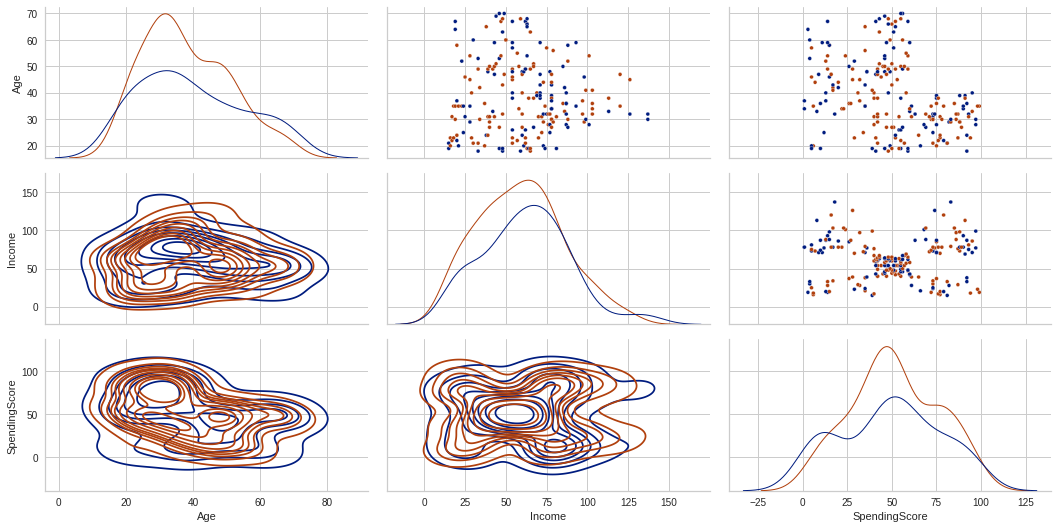

In [ ]:
grid = sns.PairGrid(customer_df, hue='Gender', diag_sharey=False, aspect=2, palette='dark')
grid.map_upper(sns.scatterplot, s=15)
grid.map_lower(sns.kdeplot)
grid.map_diag(sns.kdeplot, lw=1);



***Insights:***
1. Age, Income and Spending Score features are multimodal distributions each 
having two or three heels
2. Annual Income and Spending Score plot seems to be formed with a five dense regions: 4 regions are on the sides and one is in the center



In [ ]:
fig = px.pie(data_frame=customer_df, names='Gender', title='Customer Genders', hole=0.7, color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()



***Insights:***

1. female customers are on 6% more than males. Virtually even distribution



In [ ]:
customer_df[['Age', 'Income']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0


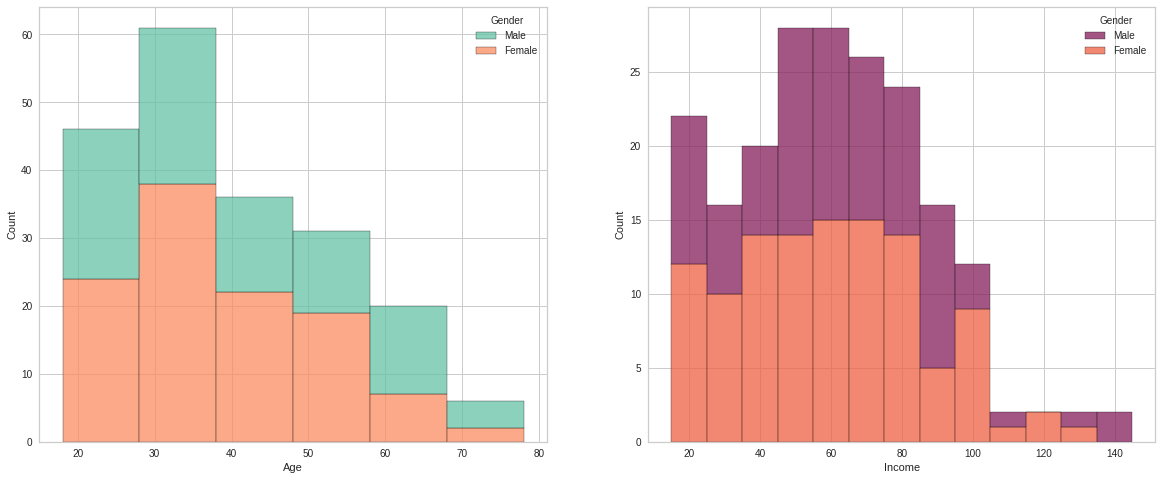

In [ ]:
_, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 8))
sns.histplot(data=customer_df, x='Age', hue='Gender', binwidth=10, multiple='stack', ax=ax0, palette='Set2')
sns.histplot(data=customer_df, x='Income', hue='Gender', binwidth=10, multiple='stack', ax=ax1, palette='rocket');



Insights:

1. 20-30, 30-40 are the most common ages groups among customers
2. The biggest cusomer age group is 30 year-old customers (mostly women)
3. Most of customers earn between $50k and $80k annually
4. Big part of customers earn only $20k annually



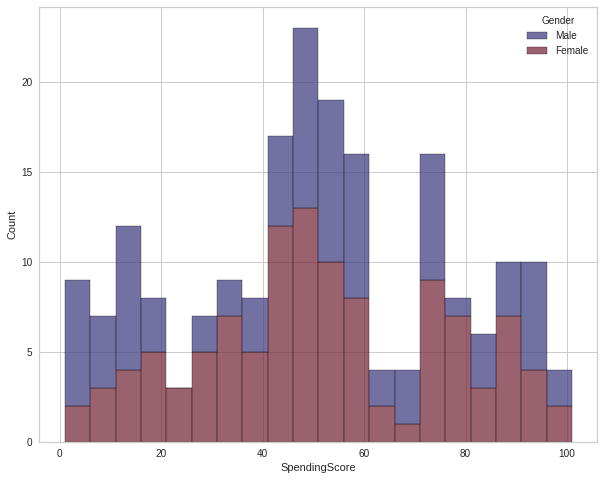

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(data=customer_df, x='SpendingScore', hue='Gender', binwidth=5, multiple='stack', palette='icefire' );



## Insights:

***Spending scores have a few modes:***
1. between 0 and 20 (men domintate)
2. between 25 and 40 (women domintate)
3. between 45 and 60 (women domintate)
4. between 65 and 70 (men dominates)
5. between 70 and 100 (women dominates)



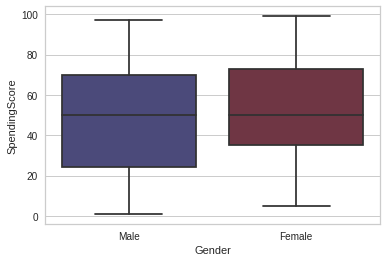

In [ ]:
sns.boxplot(data=customer_df, x='Gender', y='SpendingScore', palette='icefire');



***Insights:***
1. Women tend to spend more as we see from the bottom bar bound
2. On average, women just spend slightly more than men



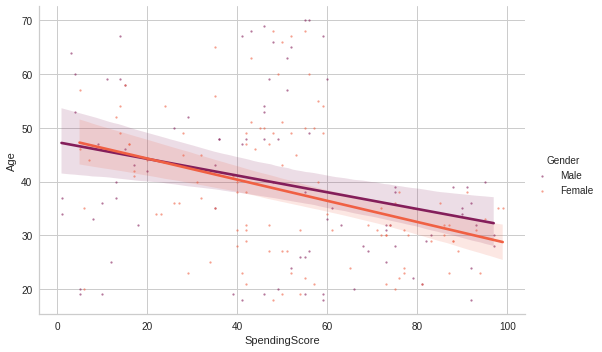

In [ ]:
sns.lmplot(data=customer_df, x='SpendingScore', y='Age', hue='Gender', aspect=1.5, scatter_kws={'s': 5, 'alpha': 0.6}, palette='rocket');



***Insights:***

There is a linear dependency between Spending Score and Age. Younger customers tend to have higher spending score and spending score decreases when age goes up.



In [ ]:
def impute_spending_group(spending_score):
    if spending_score <= 35:
        return 'low'
    if spending_score > 35 and spending_score <= 65:
        return 'medium'
    if spending_score > 65:
        return 'high'

customer_df['SpendingGroup'] = customer_df['SpendingScore'].apply(impute_spending_group)

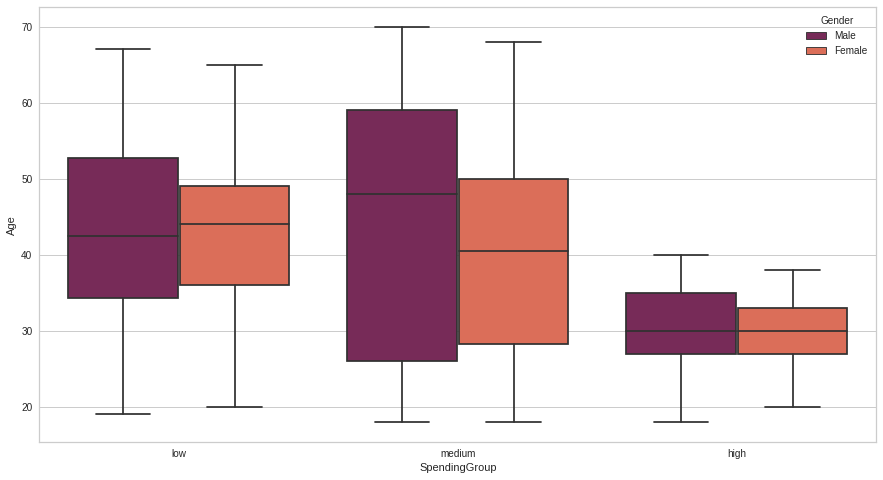

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=customer_df, x='SpendingGroup', y='Age', hue='Gender', order=['low', 'medium', 'high'], palette='rocket');

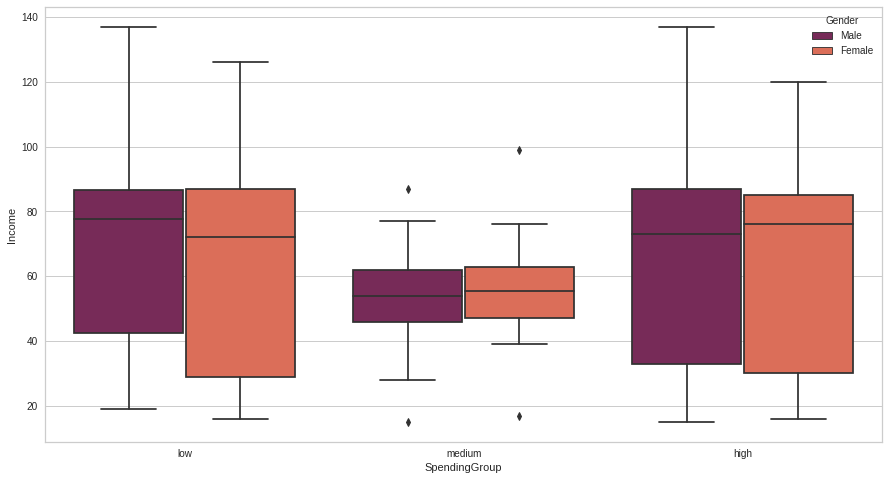

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=customer_df, x='SpendingGroup', y='Income', hue='Gender', order=['low', 'medium', 'high'], palette='rocket');



***Insights:***

1. From the Spending Group - Age plot we can see that the lowest variation is in high spending group. Its members are in 20-40 age group. Low and medium spending groups seem to roughly covers the whole age range.
2. From the Spending Group - Annual Income plot we can see that customers from the center of the annual income distribution ($40k-$60k) belongs to medium spending group



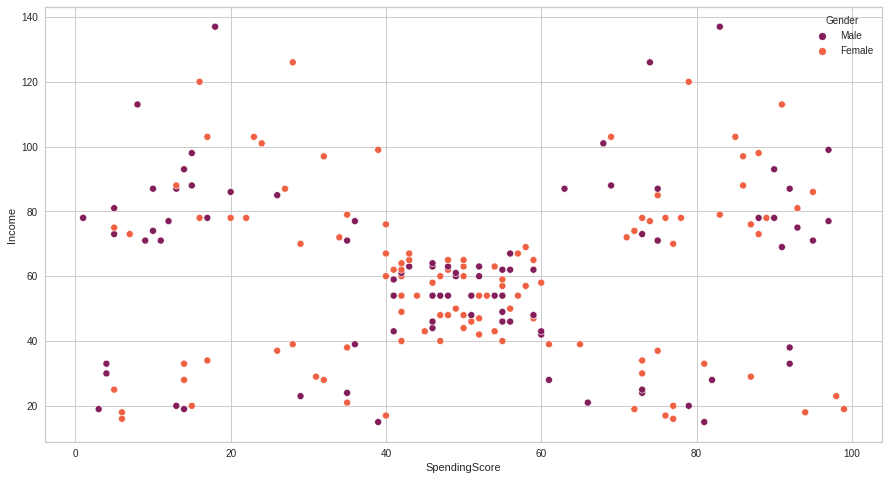

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=customer_df, x='SpendingScore', y='Income', hue='Gender', palette='rocket');



***Insights:***

***five visually recognizable clusters seem to be represent customers that:***
1. have high income and low spending score
2. low income and low spending score
3. high income and low spending score
4. high income and high spending score
5. dense middle cluster with middle income and middle spending score



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [ ]:
from sklearn.cluster import KMeans
kmean_model = KMeans(random_state=RANDOM_SEED)

In [ ]:
data_processor = Pipeline([
    ('processing', ColumnTransformer([
            ('gender_encoder', OrdinalEncoder(), ['Gender']),
            ('spending_group_encoder', OrdinalEncoder(categories=[['low', 'medium', 'high']]), ['SpendingGroup']),
        ], remainder='passthrough')
    )
])

data_processor

Pipeline(memory=None,
         steps=[('processing',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('gender_encoder',
                                                  OrdinalEncoder(categories='auto',
                                                                 dtype=<class 'numpy.float64'>),
                                                  ['Gender']),
                                                 ('spending_group_encoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']],
                                                                 dtype=<class 'numpy.float64'>),
          

In [ ]:
X = data_processor.fit_transform(customer_df)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f609e060bd0>,
                 k=None, metric=None, model=None, timings=True)

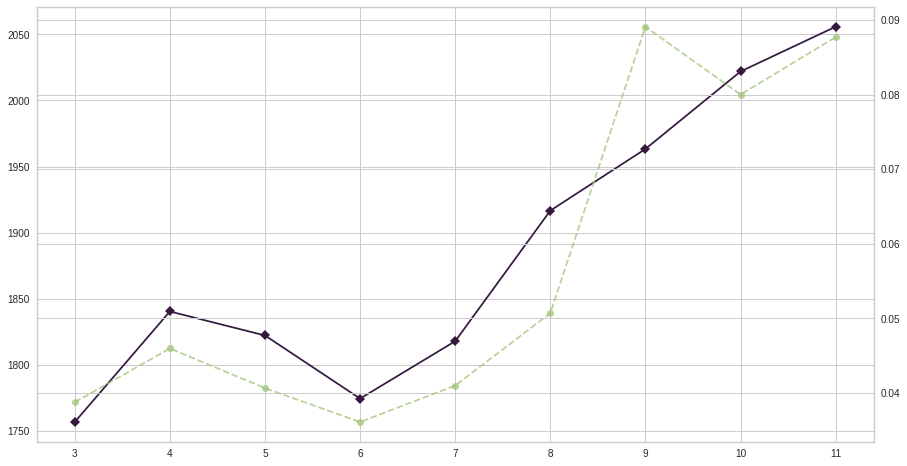

In [ ]:
plt.figure(figsize=(15, 8))
elbow_visualizer = KElbowVisualizer(kmean_model, k=(3, 12))
elbow_visualizer.fit(X)

1. Elbow method suggests to use 6 clusters rather than 5 which we assumed in the beggining. This may be correct because we looked at the two dimentional simplification of the dataset (SpendingScore-Income plot) while we have 4 dimetions in total. In more dimentional space there may be actually more distinct clusters. 
2. Now let's plot silhouette diagrams. We are going to discover [5, 6, 8] range of possible cluster numbers in order to double check that 6 is a good cluster number to go.


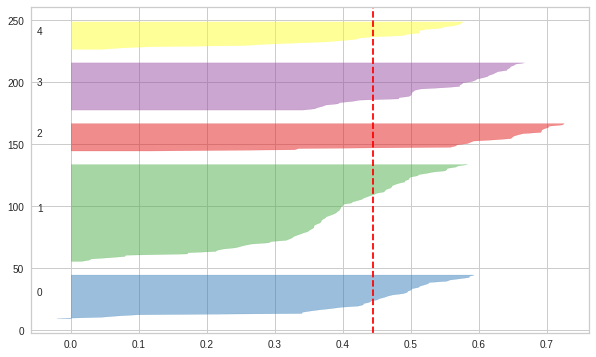

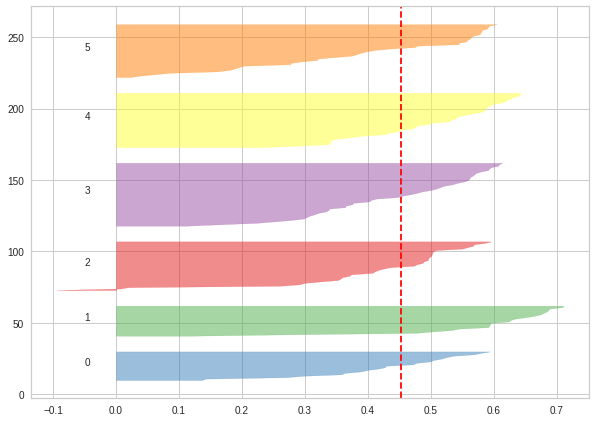

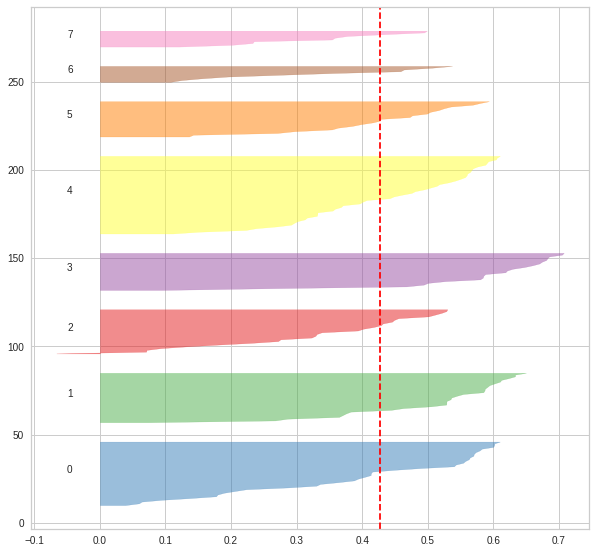

In [ ]:
for idx, n_clusters in enumerate([5, 6, 8]):
    plt.figure(figsize=(10, n_clusters * 1.2))
    kmean_model.n_clusters = n_clusters
    silhouette_visualizer = SilhouetteVisualizer(kmean_model, colors='yellowbrick')
    silhouette_visualizer.fit(X);



1. Silhouette diagrams incorporate more information than the elbow plot. Each "blade" on the diagram represents a separate cluster. Height of blades represents number of samples inside of the cluster and width represents strength of inter-cluster connections.

2. Our goal will be to find clusters of near the same size (heights are nearly the same) which are strongly connected (width is close to the right side of the plot).

3. Now taking a look at the plots we made for 5, 6, 8 clusters we can see that they are nearly the same in terms of inter-cluster connectivity and size. On the 8 cluster diagram there is one more strongly connected cluster 7 which is absent on the other plots. Let's take it as a sign of slightly better cluster quality. In a worse case we would get a little bit granual clusters which we would be able to merge according to marketing needs.

4. During experiments, I tried to go beyond 8 clusters, but higher cluster diagrams doesn't seem to optimal. Some clusters showed negative silhouette score which is sign of sample misclustering. Also, given dataset contains only 4 features which limits possible clustering. For instance, when number of clusters more than 10, silhouette diagram starts to show empty clusters.


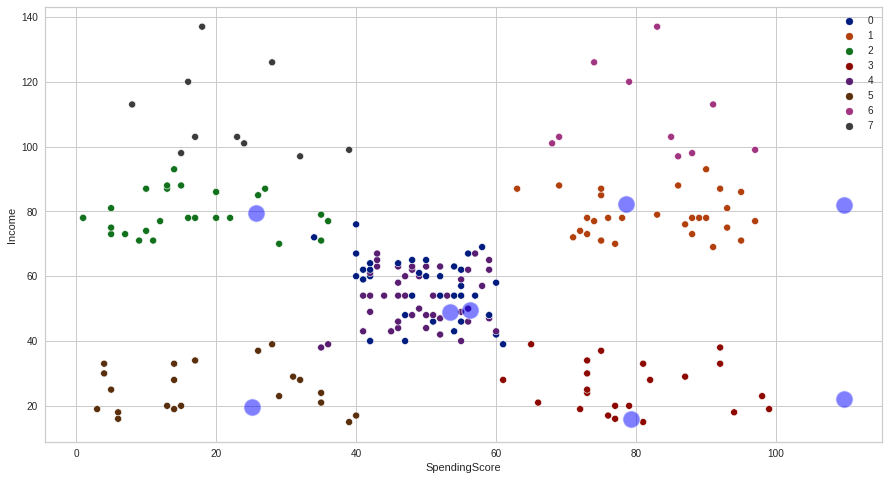

In [ ]:
kmean_model.n_clusters = 8
kmean_model.fit(X)
kmean_clusters = kmean_model.labels_
kmean_centroids = kmean_model.cluster_centers_
plt.figure(figsize=(15, 8))
sns.scatterplot(data=customer_df, x='SpendingScore', y='Income', hue=kmean_clusters, palette='dark');
sns.scatterplot(x=kmean_centroids[:, 3], y=kmean_centroids[:, 4], color='blue', s=300, alpha=0.5);

In [ ]:
kmean_model = KMeans(n_clusters=8, random_state=RANDOM_SEED)
kmean_model.fit(X)
kmean_clusters = kmean_model.labels_
kmean_centroids = kmean_model.cluster_centers_

In [ ]:
customer_df['Cluster'] = kmean_clusters

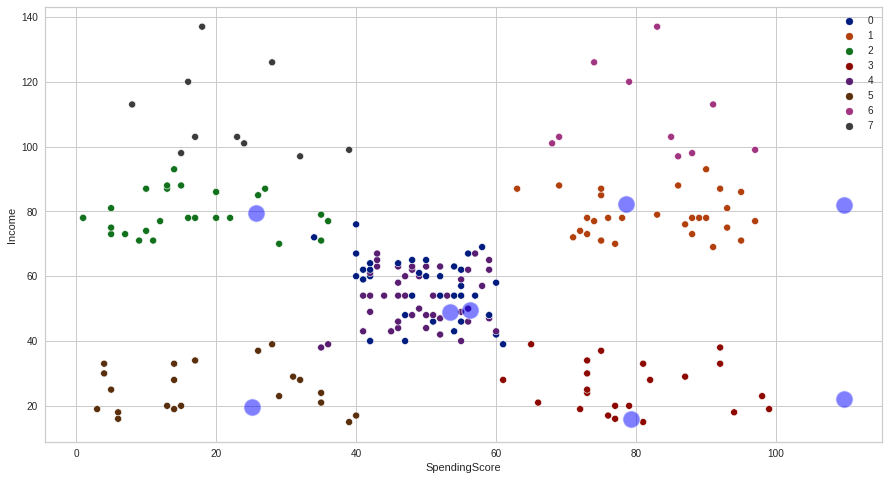

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=customer_df, x='SpendingScore', y='Income', hue='Cluster', palette='dark');
sns.scatterplot(x=kmean_centroids[:, 3], y=kmean_centroids[:, 4], color='blue', s=300, alpha=0.5);

In [ ]:
import plotly.express as px
fig = px.scatter_3d(
    customer_df,
    x='Age', 
    y='SpendingScore', 
    z='Income', 
    color=kmean_clusters.astype(str),
    opacity=0.8,
    height=700,
    width=700,
    title='Clusters in Age-SpendingScore-Income space',
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.show()

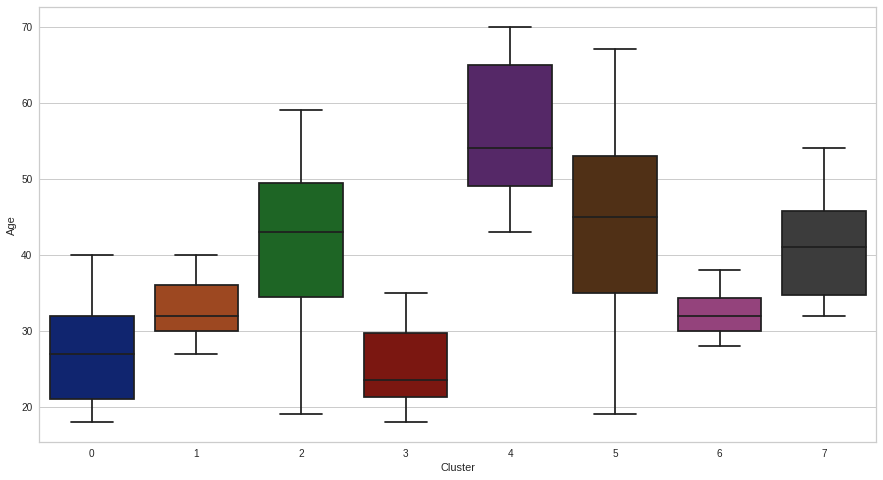

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=customer_df, x='Cluster', y='Age', palette = 'dark');



Age-SpendingScore-Income plot does a good job in distincting our clusters.

Just by looking at this 3d plot, we can see the following insights about clusters:
1. Cluster 0 - Low Spending Score, Upper-middle Income, Middle Age
2. Cluster 1 - Middle Spending Score, Middle Income, Old Age
3. Cluster 2 - High Spending Score, Upper-middle income, Middle Age
4. Cluster 3 - High Spending Score, Low Income, Young Age
5. Cluster 4 - Low Spending Score, Low Income, All Age
6. Cluster 5 - Middle Spending Score, Middle Income, Young Age
7. Cluster 6 - Low Spending Score, High Income, Middle Age
8. Cluster 7 - High Spending Score, High Income, Middle Age

Gender-SpendingScore-Income plot also was tried but it doesn't bring much information which means that gender is not significant factor for given dataset.



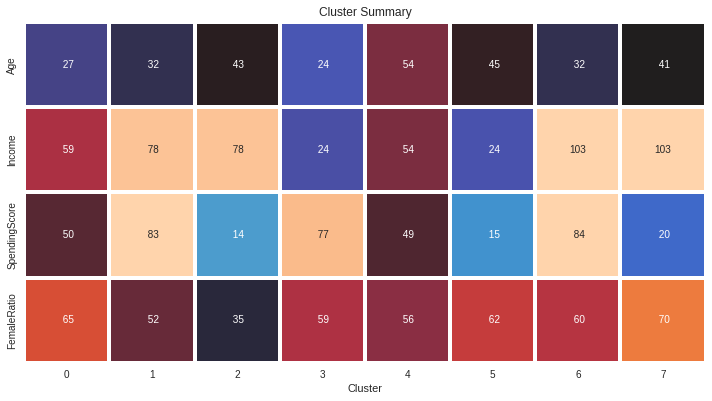

In [ ]:
cluster_heatmap_df = customer_df.groupby(['Cluster'])[['Age', 'Income', 'SpendingScore']].median()
cluster_heatmap_df['FemaleRatio'] = customer_df[customer_df['Gender'] == 'Female'].groupby(['Cluster']).count()['Gender'] / customer_df.groupby(['Cluster']).count()['Gender'] * 100
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(cluster_heatmap_df.T, square=True, linewidth=3, vmax=80, vmin=1, cmap='icefire', cbar=False, annot=True, fmt='3.0f', ax=ax);
ax.set_title('Cluster Summary');
plt.tight_layout()



***Summary***

Heat map contains Female Ratio column. Generally, we have slightly more females in the dataset (44% / 56%). However, we see that the same distribution is not necessarily preserved in all clusters:

1. Cluster 0 consists of males
2. Cluster 5 and Cluster 6 have much more females than the whole distribution
3. The rest of the clusters have just little diviations from the whole distribution

***Marketing Insights***

Now when we have described founded customer clusters, it's time to suggest useful actions. We will go cluster by cluster and see how can we improve customer spending scores:
Cluster 0 (Low Spending Score, Upper-middle Income, All Ages, 68% Males)

This cluster has a great potential because income level is higher than the average income. Most customers in this segment are males which is not common for the dataset. We suggest to take a look at product line that males potentially could buy for themselves, their partners and children. High-end products can be included for this segment.
Cluster 1 (Middle Spending Score, Middle Income, Old Age, 57% Females)

This cluster is one of the middle segments with respect to income/spending. The cluster consists of males and females with little dominance of latter (by 7%). The segment is already intrested in purchases from the mall and probably have a list of regular products they tend to buy. Analysing those products could help to perform cross-selling of related products as well as offering occasionally high-end upsells.
Cluster 2 (High Spending Score, Upper-middle income, Middle Age, 52% Females)

This is one of the most profitable segments. This segment contains almost the same distribution of males and females. High-end general purpose products are good stuff to promote in the segment.
Cluster 3 (High Spending Score, Low Income, Young Ages, 59% Females)

Customers from this segment have already showed a good spending activity, but they most likely limited in terms of budget. They may be good candidates for promotion/coupon campaigns. In worse case, they would not increase their spendings.
Cluster 4 (Low Spending Score, Low Income, All Ages, 59% Females)

This segment includes customers with low spending score and low income across all ages. There are slightly more women. Customers from this cluster would be happy to save money. Including them to any kind of promotion lists or providing accumulation accounts may help to increase purchase activities.
Cluster 5 (Middle Spending Score, Middle Income, Young Age, 66% Females)

This is a counterpart of Cluster 1 with a larger percentage of females and younger ages. This segment has a good potetial, so deals that include tranding stuff for young female audiance may help to increase spendings of the segment.
Cluster 6 (Low Spending Score, High Income, Middle Ages, 70% Females)

This segment is similar to Cluster 0, but with mostly female audience. Hence, suggestion is the same but with main focus on female's needs.
Cluster 7 (High Spending Score, High Income, Middle Ages, 60% Females)

This is one of the most profitable segments. Offering high-end female-focus products may help to keep them spend.
